<a href="https://colab.research.google.com/github/afdmoraes/GEOSelper/blob/main/afdmoraes_notebook3_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ###########
#  GeoPandas
# ###########
# Atualmente existem inúmeros formatos para codificação de dados geoespaciais vetoriais:
#  GeoJSON, GML, KML, ESRI Shapefile, Geomedia, Atlas BNA, entre outros. Além desses formatos
#  de arquivo ainda encontramos dados geoespaciais armazenados e gerenciados por Sistemas 
#  Gerenciadores de Bancos de Dados (SGBD) como MySQL, PostgreSQL, IBM DB2, Oracle e 
#  Microsoft SQL Server. Uma forte tendência é a disponibilização de dados através de 
#  serviços Web, como o OGC WFS (Web Feature Service). Por conta disso, é importante usarmos 
#  tecnologias que nos abstraiam ao máximo dos detalhes de cada um desses formatos e sistemas.

!apt install libspatialindex-dev
!pip install rtree


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 2s (256 kB/s)
Selecting previously unselected package libspatialindex

In [2]:
!pip install --upgrade geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.1 MB/s 
     |████████████████████████████████| 16.6 MB 29.0 MB/s 
     |████████████████████████████████| 7.8 MB 57.8 MB/s 


In [3]:
!pip install --upgrade mapclassify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# IMPORTANDO PANDAS
%matplotlib inline

import geopandas as gpd

gpd.__version__

'0.12.2'

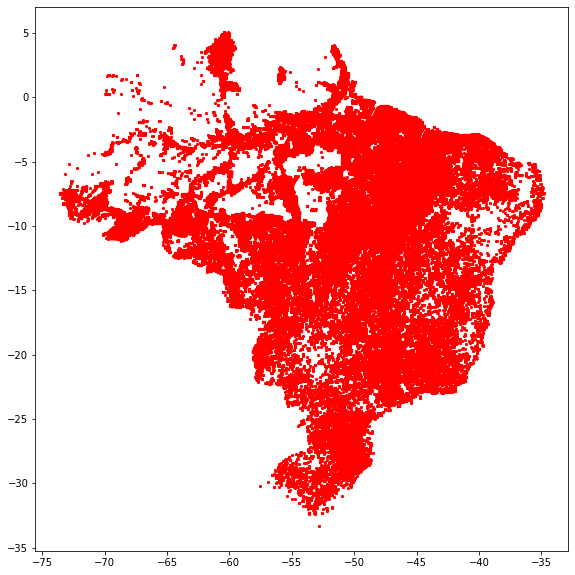

In [11]:
# Abrir arquivos

focos = gpd.read_file('./focos_2017/focos_2017.shp', encoding='utf-8')

# O comando acima irá criar um GeoDataFrame associado ao identificador focos.
# Podemos apresentar as primeiras linhas do GeoDataFrame através do método head():
focos.head()

# Para saber o número de focos carregados no GeoDataFrame, podemos utilizar a 
# função interna do Python len, como fizemos para os tipos lista e tupla:
len(focos)

# Podemos descobrir os tipos de dados das colunas do GeoDataFrame através do 
# atributo dtypes:
focos.dtypes

# Visualizando dados na forma de mapas
# Podemos visualizar os focos de queimada em um mapa utilizando a operação plot 
# do GeoDataFrame:
focos.plot(marker='x', color='red', markersize=5, figsize=(10, 10));

 #  O GeoPandas utiliza a Matplotlib para construção das visualizações e possui 
 # diversas facilidades para construção de mapas.
 


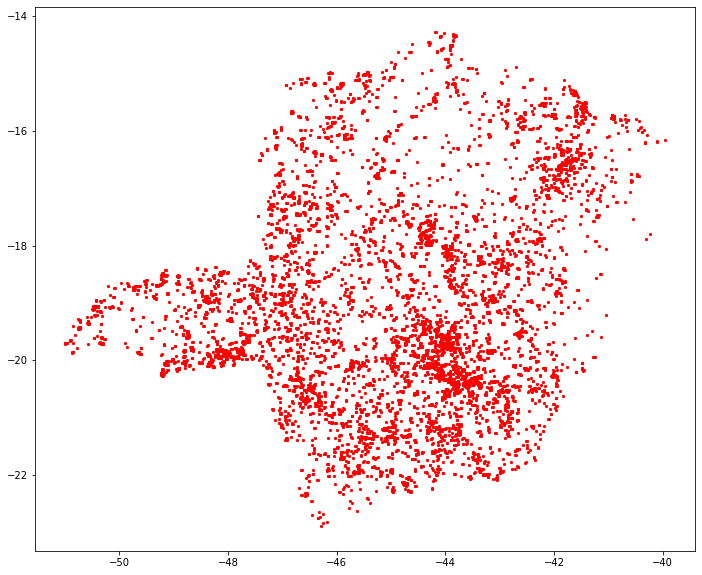

In [13]:
# Explorando o Conjunto de Dados de Focos
# Q1. Visualizar os focos de queimada do Estado de Minas Gerais.

# Q1. Visualizar os focos de queimada do Estado de Minas Gerais.
#  O operador [] permite selecionarmos apenas as linhas contendo focos do Estado 
#  de Minas Gerais. Assim, podemos criar um novo GeoDataFrame chamado focos_mg:
focos_mg = focos[focos.uf == 'MINAS GERAIS']

# Em seguida, podemos utilizar a operação plot para desenhar as geometrias desse
#  novo GeoDataFrame:
focos_mg.plot(marker='x', color='red', markersize=5, figsize=(20, 10));

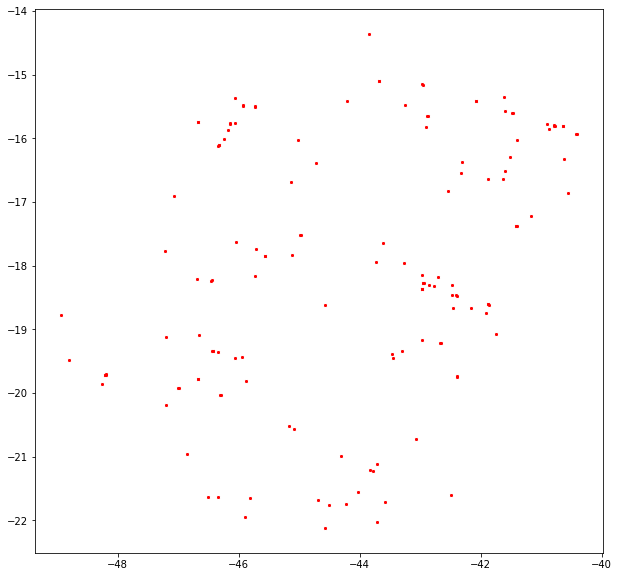

In [14]:
# Visualizar os focos de queimada do Estado de Minas Gerais no mês de novembro.
# Podemos alterar o formato de uma coluna contendo um texto (string) no formato 
# data-hora para uma coluna do tipo datetime do Python para facilitar a manipulação
#  dos dados desta coluna. Vamos fazer isso com a coluna data_obser:
import pandas as pd

focos['data_obser'] = pd.to_datetime(focos['data_obser'])

focos.dtypes

# Repare que agora a coluna data_obser é do tipo datetime64, que nos permitirá 
# utilizar operações de data e hora nesta coluna.
# Agora, podemos realizar novamente a filtragem dos dados:
focos_mg = focos[focos.uf == 'MINAS GERAIS']

focos_mg_nov = focos_mg[focos_mg.data_obser.dt.month == 11]

# Finalmente, podemos criar o mapa:
focos_mg_nov.plot(marker='x', color='red', markersize=5, figsize=(20, 10));


data_obser
1      2286
2      1271
3      1956
4      1742
5      2620
6      5464
7     17650
8     37459
9     72958
10    33642
11    19368
12    11683
Name: uf, dtype: int64

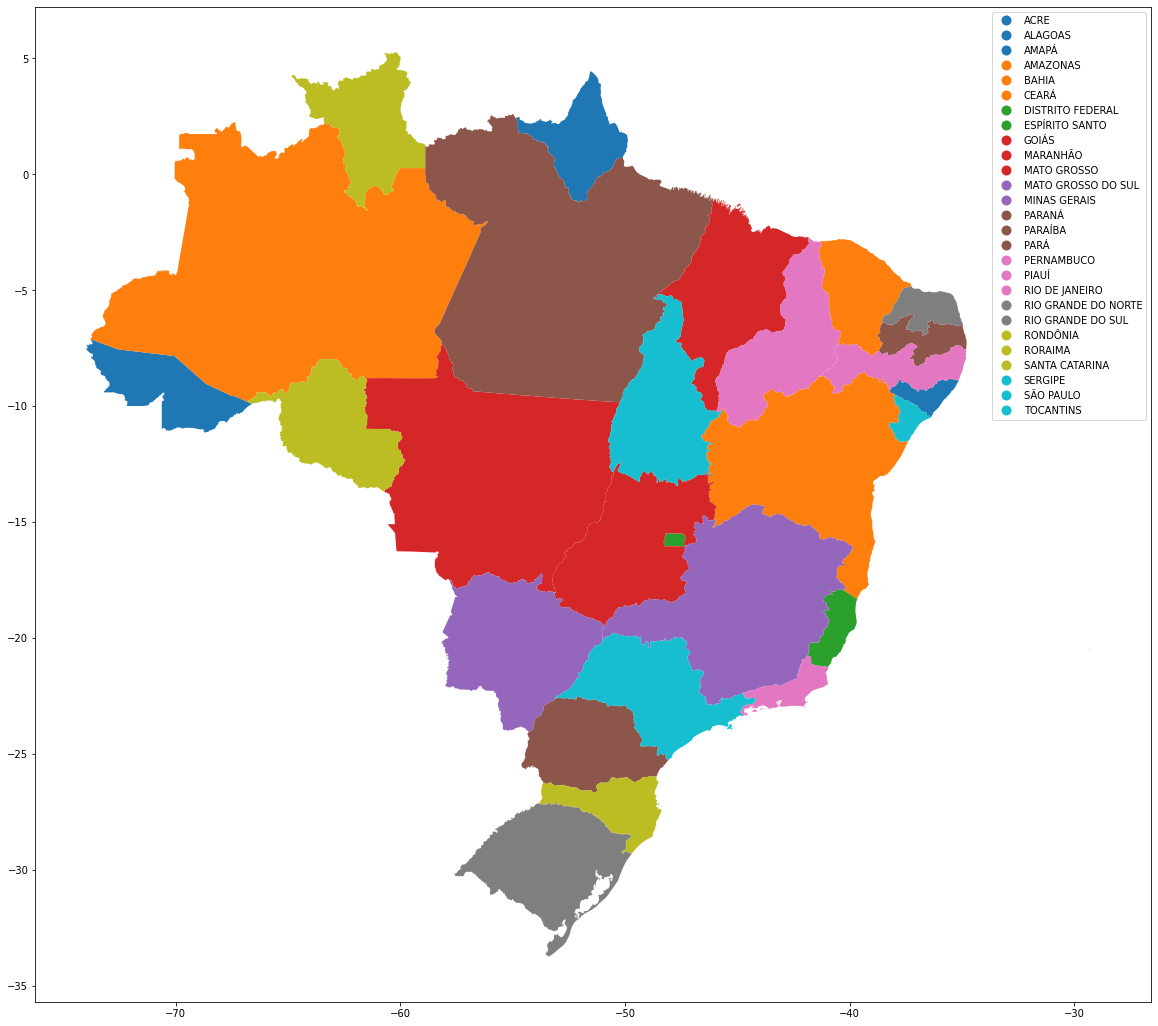

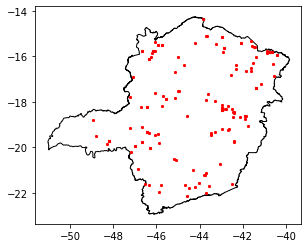

In [15]:
# Q3. Adicionar o limite do Estado de Minas Gerais ao mapa criado em Q2
uf = gpd.read_file('./br_unidades_da_federacao/BRUFE250GC_SIR.shp', encoding='utf-8')
uf.head()
uf.plot(column='NM_ESTADO', legend=True, figsize=(20, 20))

# Podemos agora selecionar a feição do Estado de Minas Gerais no GeoDataFrame uf 
# e criar um plot e, em seguida, podemos reutilizar a mesma área de desenho (ax) 
# para plotar os focos:
ax = uf[uf.NM_ESTADO == 'MINAS GERAIS'].plot(color='white', edgecolor='k')
focos_mg_nov.plot(ax=ax, marker='x', color='red', markersize=5)

# Q4. Qual a distribuição dos focos ao longo dos meses do ano em 2017?
focos_mes = focos.groupby(focos.data_obser.dt.month).uf.count()
focos_mes

In [16]:
# O objeto focos_mes retornado na operação acima corresponde a um 
# pandas.core.series.Series:
type(focos_mes)

pandas.core.series.Series

In [17]:
# Podemos re-indexar a série pelo nome do mês do ano. Para isso, podemos 
# construir uma função lambda e aplicá-la através do operador map a cada 
# um dos valores numéricos do índice do ano. Para transformar o mês do ano 
# em um nome, utilizaremos o módulo calendar da biblioteca padrão do Python.
import calendar

novo_indice = map(lambda v : calendar.month_abbr[v], focos_mes.index)

l = list(novo_indice)

l

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [18]:
# Agora podemos construir explicitamente a nova série através do construtor pd.Series:
focos_mes = pd.Series(data=focos_mes.values, index=l)

focos_mes

Jan     2286
Feb     1271
Mar     1956
Apr     1742
May     2620
Jun     5464
Jul    17650
Aug    37459
Sep    72958
Oct    33642
Nov    19368
Dec    11683
dtype: int64

In [19]:
# Podemos também ajustar o nome da série e o rótulo do índice:
focos_mes.name= 'Número Focos/Mês'

focos_mes.index.name='mes'

focos_mes




mes
Jan     2286
Feb     1271
Mar     1956
Apr     1742
May     2620
Jun     5464
Jul    17650
Aug    37459
Sep    72958
Oct    33642
Nov    19368
Dec    11683
Name: Número Focos/Mês, dtype: int64

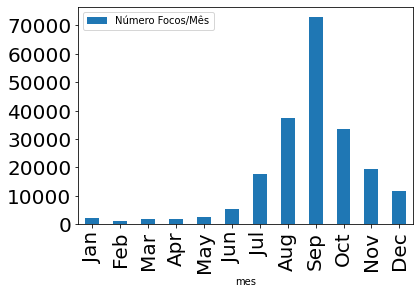

In [20]:
# Podemos apresentar um gráfico de barras com o total de focos por mê
focos_mes.plot.bar(legend=True, fontsize=20)

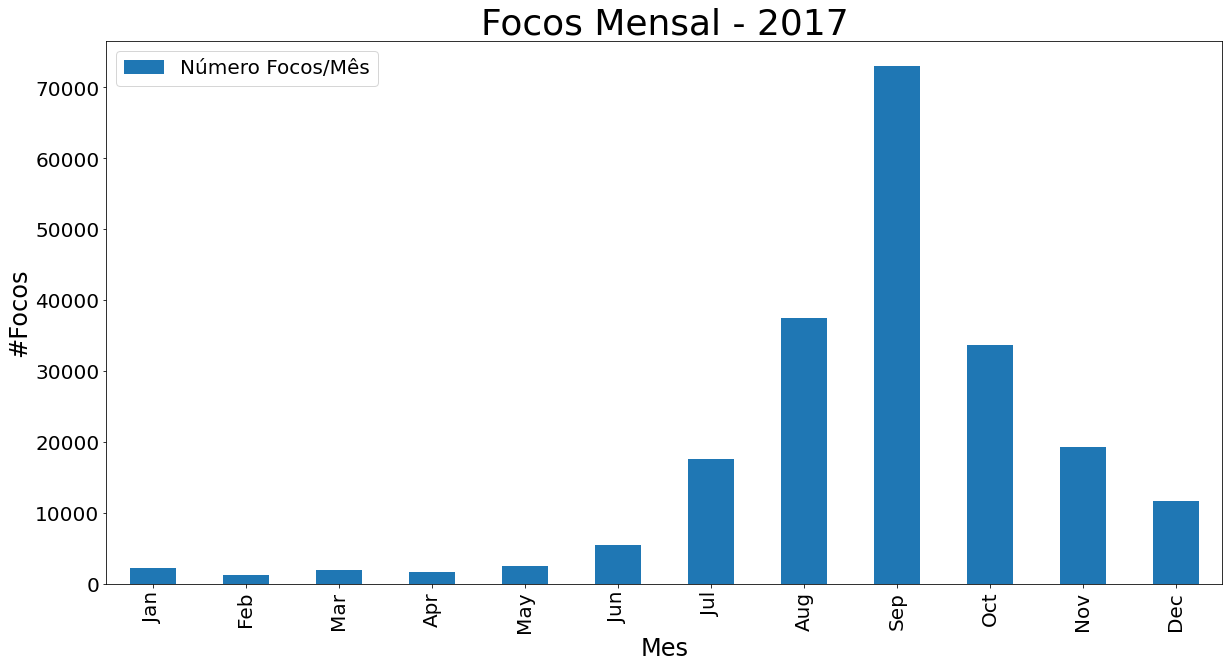

In [21]:
# Podemos melhorar nosso gráfico controlando as diversas opções de plotagem 
# fornecidas pela Matplotlib:
ax = focos_mes.plot(kind='bar', legend=True, fontsize=20, figsize=(20,10));
ax.set_title('Focos Mensal - 2017', fontsize=36);
ax.set_xlabel('Mes', fontsize=24);
ax.set_ylabel('#Focos', fontsize=24);
ax.legend(loc=2, prop={'size': 20});

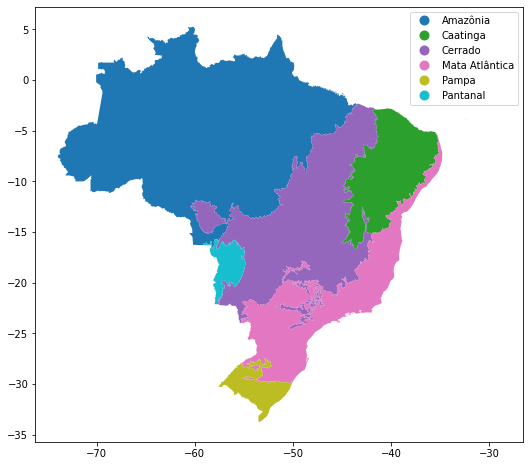

In [23]:
# Q5. Qual a distribuição dos focos no mês de Janeiro de 2017 por bioma?
biomas = gpd.read_file('./biomas/biomas.shp', encoding='utf-8')

biomas.plot(column='Bioma', legend=True, figsize=(16, 8))

In [24]:
# Esse mapa de biomas encontra-se numa projeção diferente do mapa de 
# focos. No entanto, para realizar operações espaciais entre diferentes
# GeoDataFrames, as geometrias nessas estruturas precisam estar no mesmo
# sistema de referência espacial. Por isso, vamos reprojetar as geometrias
# do mapa de biomas para a mesma do de focos, isto é, para um sistema 
# identificado pelo código EPSG:4326:
biomas = biomas.to_crs('EPSG:4326')

# Agora que temos as geometrias dos dois GeoDataFrames no mesmo sistema de 
# referência espacial, podemos realizar a junção das informações utilizando 
# a função sjoin, que irá combinar as linhas dos dois GeoDataFrames através 
# de um relacionamento espacial:
focos_jan = focos[focos.data_obser.dt.month == 1]

focos_jan_biomas = gpd.sjoin(focos_jan, biomas, how='inner', op='intersects')

# A operação acima irá criar um novo GeoDataFrame denominado focos_biomas que 
# irá conter todas as colunas do GeoDataFrame focos além das das colunas não-geométricas
# do GeoDataDrame biomas:
focos_jan_biomas.head()



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,id,data_obser,satelite,colecao,satelite_r,am_pm,path_row,uf,geometry,index_right,Bioma,CD_Bioma
11,224967591,2017-01-22 17:06:00,AQUA_M-T,MODIS.C6,t,pm,None,PARÁ,POINT (-52.74900 -3.07600),0,Amazônia,1
59,223383569,2017-01-02 17:28:00,AQUA_M-T,MODIS.C6,t,pm,None,MATO GROSSO,POINT (-56.35000 -12.49300),0,Amazônia,1
541,223471645,2017-01-03 16:34:00,AQUA_M-T,MODIS.C6,t,pm,None,PARÁ,POINT (-51.09800 -6.57800),0,Amazônia,1
542,223471646,2017-01-03 16:34:00,AQUA_M-T,MODIS.C6,t,pm,None,PARÁ,POINT (-51.10500 -6.57200),0,Amazônia,1
543,225278535,2017-01-26 16:40:00,AQUA_M-T,MODIS.C6,t,pm,None,PARÁ,POINT (-51.11300 -6.57800),0,Amazônia,1


In [25]:
# Agora, podemos utilizar o operador groupby para agrupar as linhas do novo 
# GeoDataFrame focos_biomas pela coluna Bioma e, então, calcular a contagem 
# de focos por bioma:
focos_bioma = focos_jan_biomas.groupby('Bioma').Bioma.count()

focos_bioma

Bioma
Amazônia          821
Caatinga          261
Cerrado           530
Mata Atlântica    401
Pampa              14
Pantanal          259
Name: Bioma, dtype: int64

In [26]:
# Podemos acertar o nome
focos_bioma.index.name = 'Biomas'
focos_bioma.name = 'Numero Focos por Bioma'

focos_bioma

Biomas
Amazônia          821
Caatinga          261
Cerrado           530
Mata Atlântica    401
Pampa              14
Pantanal          259
Name: Numero Focos por Bioma, dtype: int64

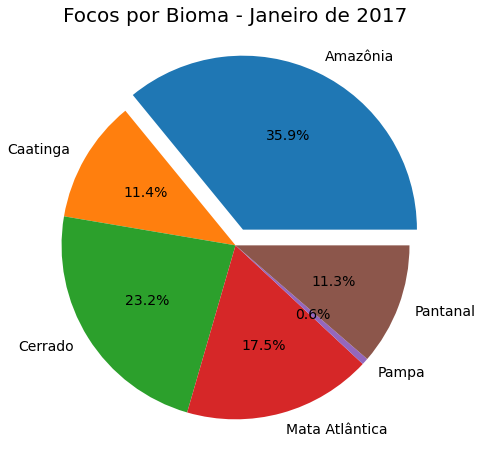

In [27]:
#  Podemos agora desenhar um gráfico circular:
explode=[0.1, 0.0, 0.0, 0.0, 0.0, 0.0]

ax = focos_bioma.plot(kind='pie',
                      explode=explode,
                      autopct='%1.1f%%',
                      figsize=(8,8), fontsize='14');

ax.set_title('Focos por Bioma - Janeiro de 2017', fontsize=20);

ax.set_ylabel('');

In [30]:
# Q6. Qual a frequência mensal de queimadas por bioma no Estado de Minas Gerais?
focos_mg = focos[focos.uf == 'MINAS GERAIS']


In [31]:
# Apenas para facilitar nosso trabalho, vamos adicionar uma nova coluna chamada 
# mes no GeoDataFrame focos_mg:
focos_mg['mes'] = focos_mg['data_obser'].dt.month

focos_mg.head()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,data_obser,satelite,colecao,satelite_r,am_pm,path_row,uf,geometry,mes
53,233530676,2017-06-07 16:12:00,AQUA_M-T,MODIS.C6,t,pm,None,MINAS GERAIS,POINT (-43.77700 -20.55300),6
171,249616927,2017-10-11 16:25:00,AQUA_M-T,MODIS.C6,t,pm,None,MINAS GERAIS,POINT (-46.35700 -19.57700),10
175,249918391,2017-10-14 16:55:00,AQUA_M-T,MODIS.C6,t,pm,None,MINAS GERAIS,POINT (-43.36200 -18.22000),10
486,227037634,2017-02-19 17:26:00,AQUA_M-T,MODIS.C6,t,pm,None,MINAS GERAIS,POINT (-43.77500 -20.55300),2
487,231105998,2017-04-23 16:43:00,AQUA_M-T,MODIS.C6,t,pm,None,MINAS GERAIS,POINT (-43.77700 -20.55600),4


In [32]:
focos_mg_biomas = gpd.sjoin(focos_mg, biomas, how='inner', op='intersects')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [33]:
# Vamos apresentar as informações em uma pivot_table:
pvt = pd.pivot_table(focos_mg_biomas, values='id', index=['Bioma'],
                     columns=['mes'], aggfunc='count',
                     fill_value=0, margins=True)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'total']

pvt


,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
Bioma,,,,,,,,,,,,,
Caatinga,2,0,1,7,7,8,9,35,29,105,11,2,216
Cerrado,56,34,53,42,88,150,312,924,1604,1159,63,41,4526
Mata Atlântica,43,22,47,20,33,82,160,661,1456,1079,72,19,3694
All,101,56,101,69,128,240,481,1620,3089,2343,146,62,8436


In [34]:
#Vamos remover a totalização nas linhas e colunas para obter uma estatística descritiva:
pvt = pd.pivot_table(focos_mg_biomas, values='id', index=['Bioma'],
                     columns=['mes'], aggfunc='count',
                     fill_value=0)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

pvt

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
Bioma,,,,,,,,,,,,
Caatinga,2,0,1,7,7,8,9,35,29,105,11,2
Cerrado,56,34,53,42,88,150,312,924,1604,1159,63,41
Mata Atlântica,43,22,47,20,33,82,160,661,1456,1079,72,19


In [35]:
# Execute
pvt.describe()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,33.666667,18.666667,33.666667,23.000000,42.666667,80.000000,160.333333,540.000000,1029.666667,781.000000,48.666667,20.666667
std,28.183920,17.243356,28.448784,17.691806,41.356176,71.021124,151.500275,456.684793,869.756479,586.798091,32.929217,19.553346
min,2.000000,0.000000,1.000000,7.000000,7.000000,8.000000,9.000000,35.000000,29.000000,105.000000,11.000000,2.000000
25%,22.500000,11.000000,24.000000,13.500000,20.000000,45.000000,84.500000,348.000000,742.500000,592.000000,37.000000,10.500000
50%,43.000000,22.000000,47.000000,20.000000,33.000000,82.000000,160.000000,661.000000,1456.000000,1079.000000,63.000000,19.000000
75%,49.500000,28.000000,50.000000,31.000000,60.500000,116.000000,236.000000,792.500000,1530.000000,1119.000000,67.500000,30.000000
max,56.000000,34.000000,53.000000,42.000000,88.000000,150.000000,312.000000,924.000000,1604.000000,1159.000000,72.000000,41.000000
